#CNN Classification Project

By: Chloe Jones and Victoria Jorden

#Problem Statement
- Develop a machine learning model that accurately classifies 525 different types of birds We will employ cross-validation as the benchmark for evaluating model performance. The model is trained on the training data, validated on the validation set to fine-tune hyperparameters, and finally evaluated on the unseen testing set to assess its generalizability.The data source is the 525-bird-species dataset from Kaggle. It consists of labeled images categorized into 525 bird species. We anticipate encountering common image classification challenges like variations in lighting, pose, and background clutter.The project's goal is to build a robust CNN model that can achieve high accuracy in classifying bird species from images. This model could potentially be used for various applications, such as automated bird identification in ecological surveys or educational tools for bird enthusiasts.


#Dataset
###Overview
The dataset used for this project is the "525-bird-species" dataset from Kaggle, ideal for image recognition and classification projects.
- 525 bird species total
- 84635 training images
- 2625 test images (5 per species)
- 2625 validation images (5 per species)

###Columns
- class id: class index value
- filepaths: file path for each image (eg. 'train/ABBOTTS BABBLER/001.jpg')
- label: bird species label
- data set: which data set the image belongs to (train/test/other)
- scientific name: scientific name of bird species

###Benchmarks and Evaluation
The dataset is split into training, testing, and validation sets which will allow us to effectively train our model and evaluate our test set. Our main benchmark will be how accurately we can classify the images into the correct bird species. As mentioned above, we will be cross validating to make sure our model's performance is consistent.



In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.95G/1.96G [01:05<00:00, 31.2MB/s]
100% 1.96G/1.96G [01:05<00:00, 31.8MB/s]


In [ ]:
!unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/WHITE TAILED TROPIC/120.jpg  
  inflating: train/WHITE TAILED TROPIC/121.jpg  
  inflating: train/WHITE TAILED TROPIC/122.jpg  
  inflating: train/WHITE TAILED TROPIC/123.jpg  
  inflating: train/WHITE TAILED TROPIC/124.jpg  
  inflating: train/WHITE TAILED TROPIC/125.jpg  
  inflating: train/WHITE TAILED TROPIC/126.jpg  
  inflating: train/WHITE TAILED TROPIC/127.jpg  
  inflating: train/WHITE TAILED TROPIC/128.jpg  
  inflating: train/WHITE TAILED TROPIC/129.jpg  
  inflating: train/WHITE TAILED TROPIC/130.jpg  
  inflating: train/WHITE TAILED TROPIC/131.jpg  
  inflating: train/WHITE TAILED TROPIC/132.jpg  
  inflating: train/WHITE TAILED TROPIC/133.jpg  
  inflating: train/WHITE TAILED TROPIC/134.jpg  
  inflating: train/WHITE TAILED TROPIC/135.jpg  
  inflating: train/WHITE TAILED TROPIC/136.jpg  
  inflating: train/WHITE TAILED TROPIC/137.jpg  
  inflating: train/WHITE TAILED TROPIC/138.jpg  
  inflating: train

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import image_dataset_from_directory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loads images into dataframes

In [ ]:
train_dataset = image_dataset_from_directory(
 "/content/train",
    image_size=(224, 224),
    shuffle=True,  # Shuffle for better mixing
    batch_size=32)

test_dataset = image_dataset_from_directory(
 "/content/test",
    image_size=(224, 224),
    batch_size=32)

vaild_dataset = image_dataset_from_directory(
 "/content/valid",
    image_size=(224, 224),
    batch_size=32)

print(train_dataset)

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


#Exploratory Data Analysis
- 1. Sample Images:
Graph: Grid of images showcasing examples from various bird species.

  Why: This provides a visual sense of the dataset's content, image quality, and diversity in bird poses, backgrounds, and lighting conditions.
- 2. Data Preprocessing Steps:
Method: Normalizng Images and Data Augmentation

  Why: Preprocessing helps standardize the data and improve training efficiency. Normalization aids in faster convergence and data augmentation artificially increases data volume and enhances model robustness.
- 3. Number of Instances per Classes

  Why: If there is an imbalance it can lead a CNN to prioritizing the majority class during training, harming its ability to recognize the minority class accurately.

#Data Preprocessing
###Dimensionality Reduction
Typically, CNN projects do not use traditional dimensionality reduction techniques because convolutional neural networks perform reduction. The convolutional layers effectively reduce the dimensionality of the input images while capturing the essential feature of the image (texture, edges, shapes, etc).

###Scaling
Unlike dimensionality reduction, scaling is an important and distinct step in CNN. Below we have normalized the images by scaling the pixel values to a range from 0 to 1. This helps with faster convergence during training.

##Displays 12 images from training data

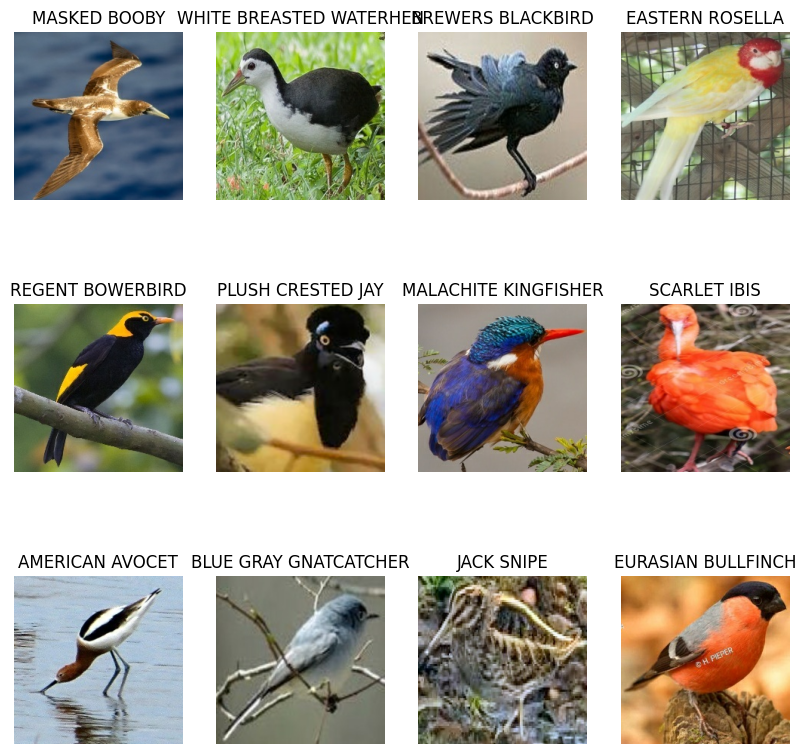

In [ ]:
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis("off")
    plt.show()

##Normalization

In [ ]:
scaler = tf.keras.layers.Rescaling(1./255)  # Rescale to [0, 1]
normalized_ds = train_dataset.map(lambda x, y: (scaler(x), y))

image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Now print the minimum and maximum values of the normalized image
print(np.min(first_image), np.max(first_image))

0.0 1.0


##Checking Instances per class

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/BIRDS/100-bird-species/birds.csv")
df.head()

class id                      filepaths           labels data set  \
0       0.0  train/ABBOTTS BABBLER/001.jpg  ABBOTTS BABBLER    train   
1       0.0  train/ABBOTTS BABBLER/007.jpg  ABBOTTS BABBLER    train   
2       0.0  train/ABBOTTS BABBLER/008.jpg  ABBOTTS BABBLER    train   
3       0.0  train/ABBOTTS BABBLER/009.jpg  ABBOTTS BABBLER    train   
4       0.0  train/ABBOTTS BABBLER/002.jpg  ABBOTTS BABBLER    train   

        scientific name  
0  MALACOCINCLA ABBOTTI  
1  MALACOCINCLA ABBOTTI  
2  MALACOCINCLA ABBOTTI  
3  MALACOCINCLA ABBOTTI  
4  MALACOCINCLA ABBOTTI

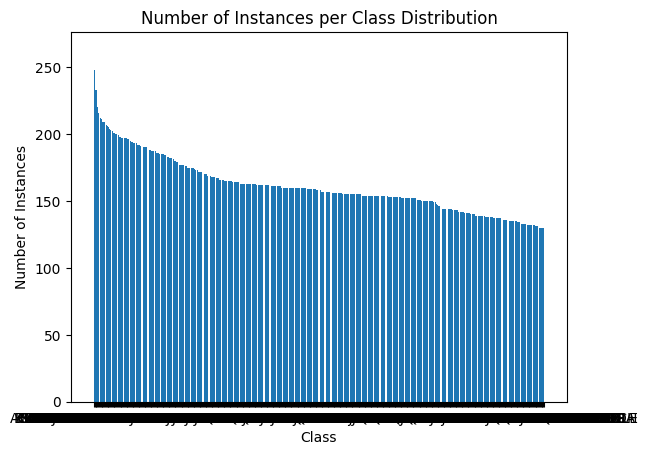

In [ ]:
df_training = df[df['data set'] == 'train']
# Get the number of instances per class
n_instance_per_class = df_training['labels'].value_counts()

# Create a bar chart
plt.bar(n_instance_per_class.index, n_instance_per_class.values)
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.title("Number of Instances per Class Distribution")
plt.show()

Instances evenly distubuted dont need to augment any spefeic classes

#Data Augmentation

  - if sucess rate isnt good enough will implement

#Base CNN Model

In [ ]:
def pipeline(tf_data):
    tf_data = tf_data.shuffle(100)
    tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    return tf_data

tf_train_data = pipeline(train_dataset)
tf_val_data = pipeline(vaild_dataset)

print(tf_train_data)
print(tf_val_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='valid'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),

    tf.keras.layers.Dense(525, activation='softmax'),
])

In [ ]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 46656)             0         
                                                                 
 dense (Dense)               (None, 120)               5

In [11]:
train_log = model.fit(
    tf_train_data,
    validation_data=tf_val_data,
    epochs=10
)

Epoch 1/10
2645/2645 [==============================] - 1017s 384ms/step - loss: 5.8777 - accuracy: 0.0186 - val_loss: 5.3427 - val_accuracy: 0.0408
Epoch 2/10
2645/2645 [==============================] - 993s 375ms/step - loss: 4.9527 - accuracy: 0.0782 - val_loss: 4.7304 - val_accuracy: 0.1078
Epoch 3/10
2645/2645 [==============================] - 989s 374ms/step - loss: 4.0219 - accuracy: 0.1796 - val_loss: 4.8368 - val_accuracy: 0.1192
Epoch 4/10
2645/2645 [==============================] - 988s 373ms/step - loss: 3.0594 - accuracy: 0.3182 - val_loss: 5.6199 - val_accuracy: 0.1074
Epoch 5/10
2645/2645 [==============================] - 991s 374ms/step - loss: 2.2894 - accuracy: 0.4531 - val_loss: 6.8542 - val_accuracy: 0.0952
Epoch 6/10
2645/2645 [==============================] - 990s 374ms/step - loss: 1.7252 - accuracy: 0.5705 - val_loss: 7.9413 - val_accuracy: 0.1025
Epoch 7/10
2645/2645 [==============================] - 995s 376ms/step - loss: 1.3594 - accuracy: 0.6520 - val

Training accuracy: 0.770710
Validation accuracy: 0.096000


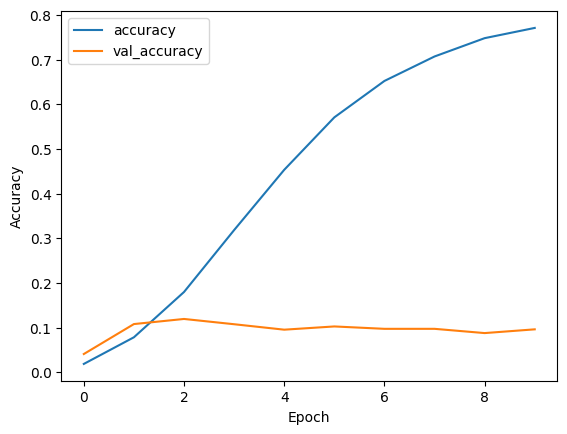

In [12]:
plt.plot(train_log.history['accuracy'], label='accuracy')
plt.plot(train_log.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

print('Training accuracy: %f' % train_log.history['accuracy'][-1])
print('Validation accuracy: %f' % train_log.history['val_accuracy'][-1])

1/1 [==============================] - 0s 371ms/step


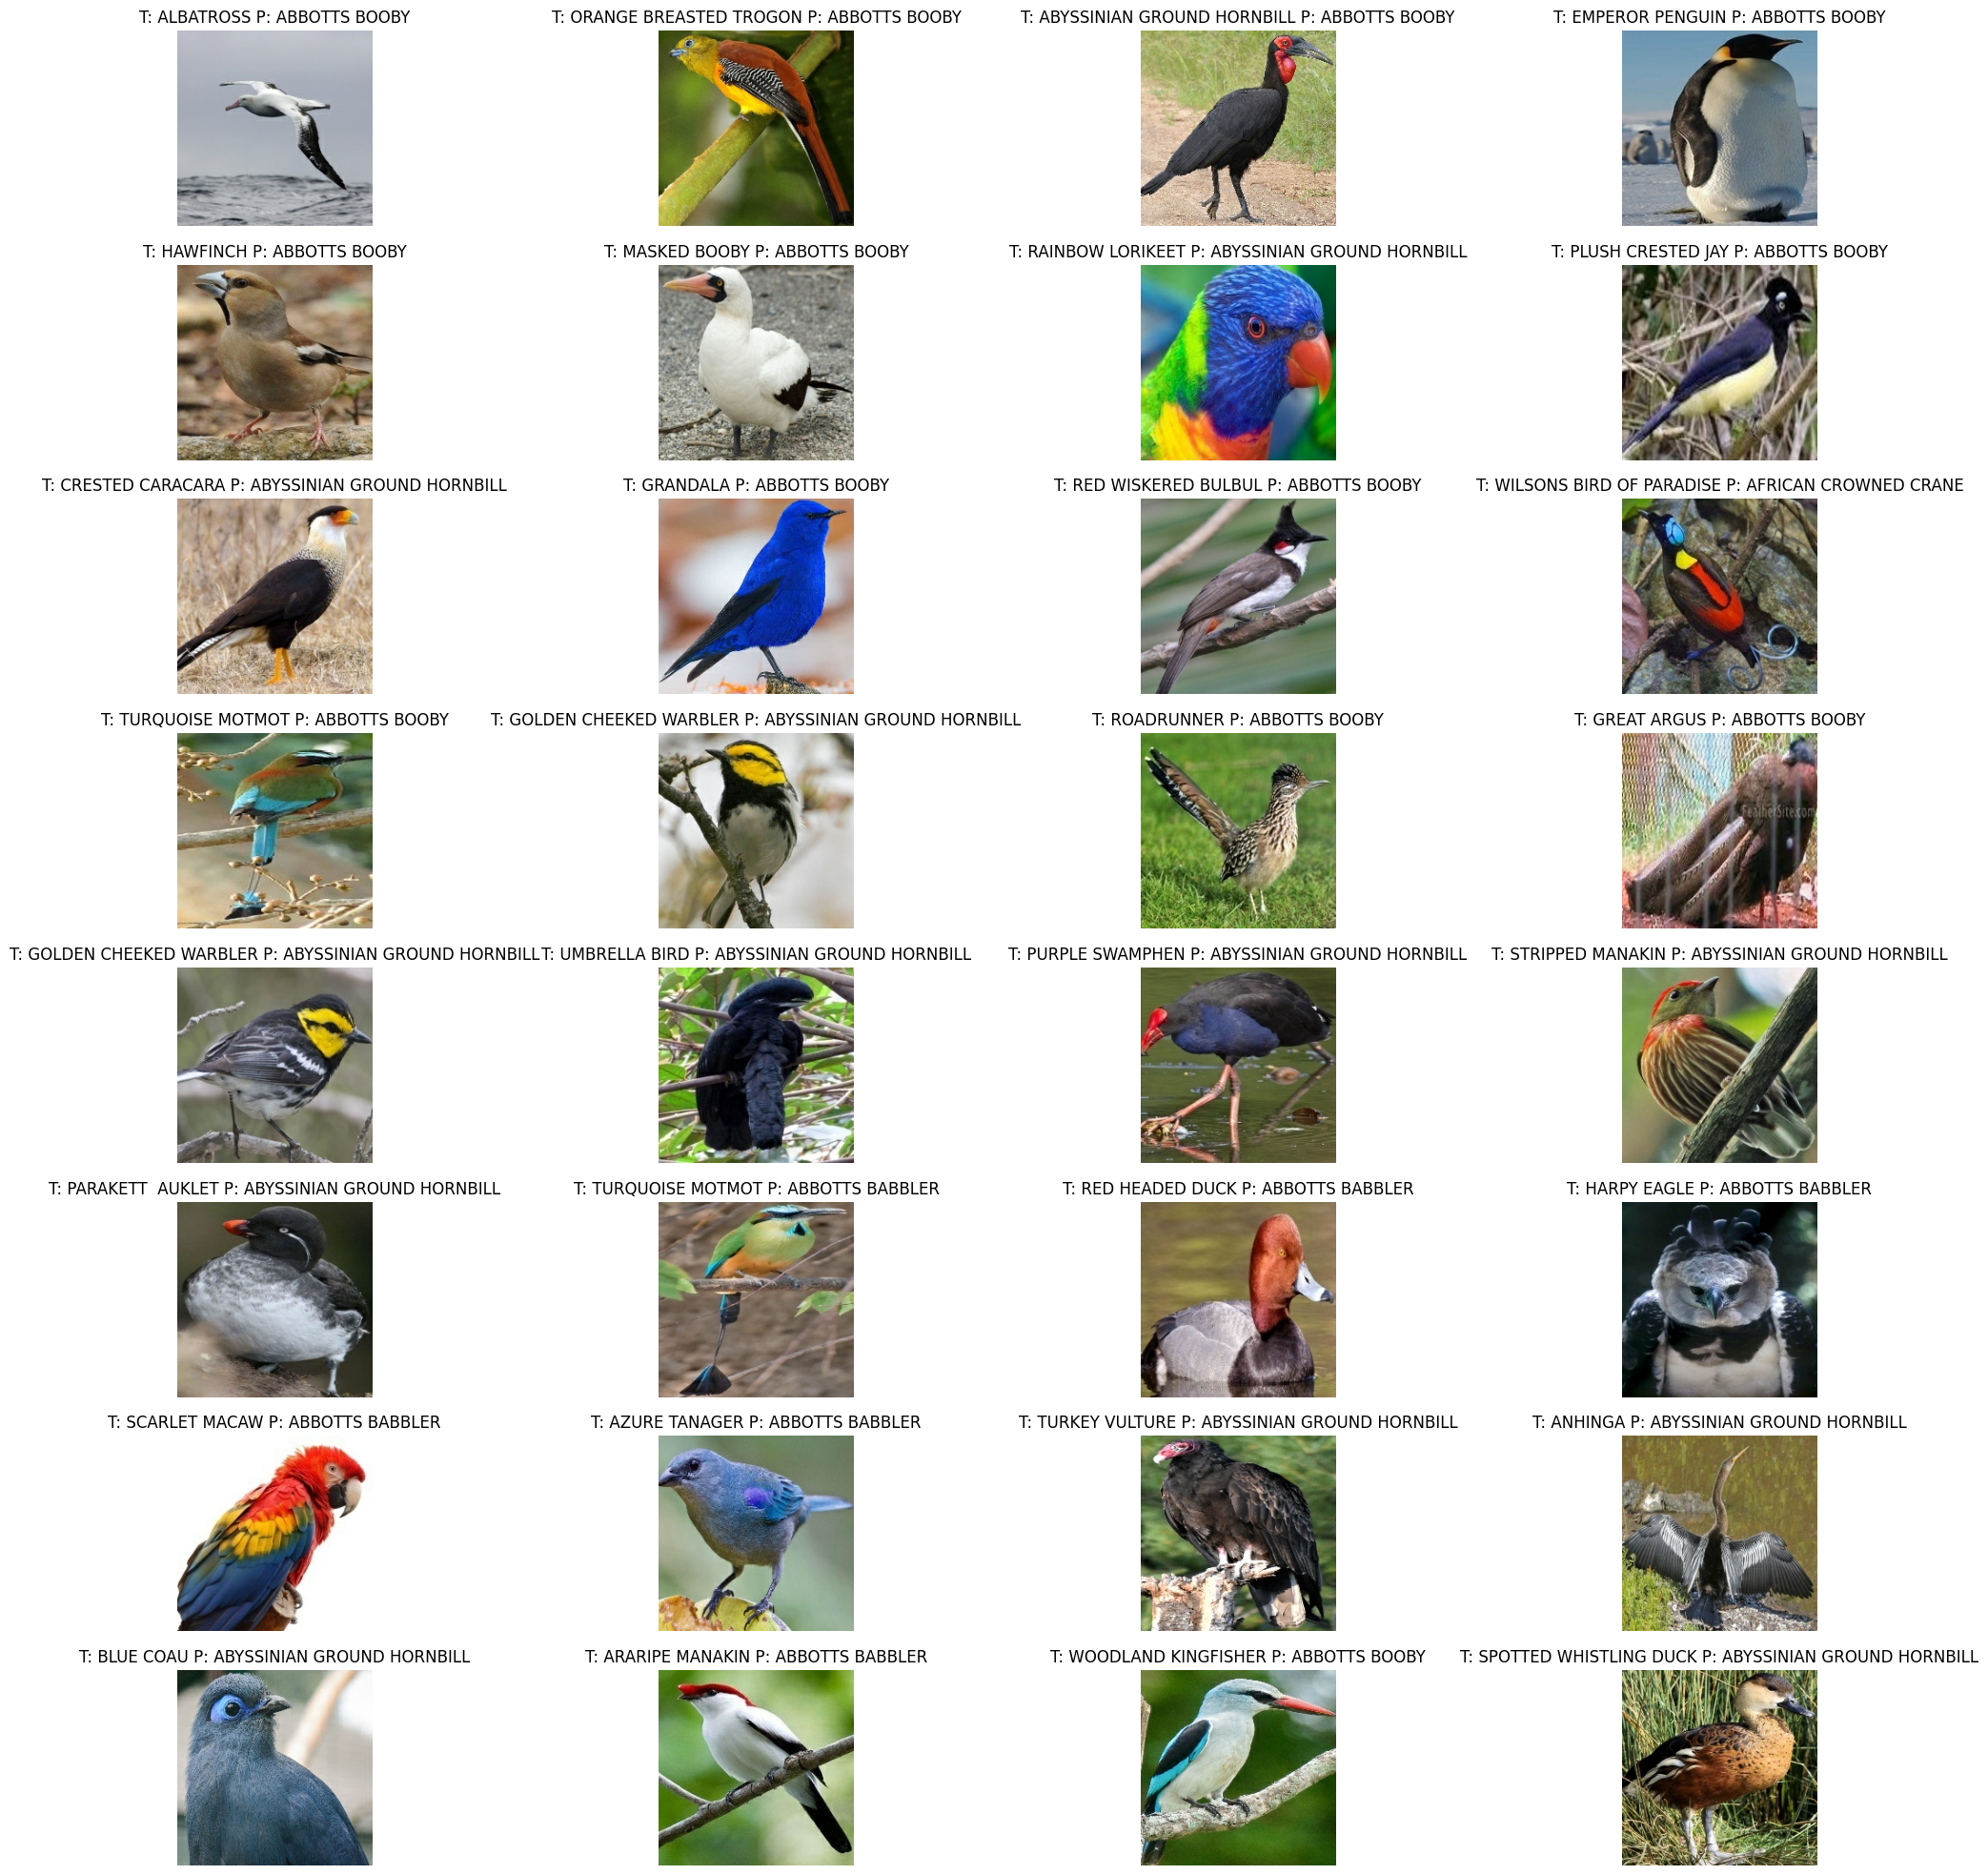

In [13]:
class_labels = df_training['labels']  # Assuming df_training contains class labels

test1_dataset_iter = iter(test_dataset.take(1))

images, labels = next(test1_dataset_iter)

# Make predictions
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

num_images = len(images)
num_rows = (num_images + 3) // 4
num_cols = min(num_images, 4)

# Display the images with their true and predicted labels
plt.figure(figsize=(25, 25))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title("T: " + train_dataset.class_names[labels[i]] + " P: " + str(class_labels[predicted_labels[i]]))
    plt.axis("off")
plt.show()


In [15]:
model_1_val_result=model.evaluate(vaild_dataset)
model_1_val_result

model_1_val_result=model.evaluate(test_dataset)
model_1_val_result

83/83 [==============================] - 7s 78ms/step - loss: 11.8216 - accuracy: 0.0952


[11.821556091308594, 0.095238097012043]

#Machine Learning Approaches

###Baseline Evaluation Setup
- Data Splits: Our data is split between train, test, and validation sets so will will be able to have an unbiased evaluation of our model's performance.
- Accuracy as primary metric: Since we are working on a classification project, accuracy will be our more important metric. Accuracy will measure how often our model correctly predicts the bird species label from the image.
- Cross-Validation: Using k-fold cross validation will allow us to test our model's performance across our subsets, helping us to avoid overfitting.

###Convolutional Neural Networks
We chose to use CNN for our project because of their proven success when it comes to image data. They are able to learn spatial hierarchies of features, which makes them highly effective in image classification.

###What we will do between now and project submission

  - adjust CNN to improve accuracy
  - implement measures display our models accuracy
  - show how new model outpreforms baseline model

#Experiments

#Conclusion